# Yolov5

In [ ]:
# !pwd
!git clone https://github.com/ultralytics/yolov5
!pip install -r ./yolov5/requirements.txt

In [ ]:
import yaml

path = './car_data/car_label/yaml2/data.yaml'
with open(path, 'r') as f : 
    data = yaml.load(f, Loader=yaml.FullLoader) 
    data['train'] = 'path/train/images'
    data['val'] = 'path/valid/images'
    data['nc'] = 1 
    data['names'] = ['tire'] #class names

    with open(path, 'w')  as f: 
        yaml.dump(data, f)
        print(data)

##### Matching Images and Labels (Check)

In [3]:
!ls car_data/car_label/yaml/train/images | head -4
print()
!ls car_data/car_label/yaml/train/labels | head -4

1--1-_png.rf.49e26e46b9fc5e17bd8a91656c2a8e9e.jpg
1--1-_png.rf.fb313d8418bcbb54145145dba3eef4a5.jpg
1--10-_jpg.rf.8eab3c9e7589f85e116452c07e36dd70.jpg
1--10-_jpg.rf.b5252fdbc74c9de7bcc38561b98a190f.jpg

1--1-_png.rf.49e26e46b9fc5e17bd8a91656c2a8e9e.txt
1--1-_png.rf.fb313d8418bcbb54145145dba3eef4a5.txt
1--10-_jpg.rf.8eab3c9e7589f85e116452c07e36dd70.txt
1--10-_jpg.rf.b5252fdbc74c9de7bcc38561b98a190f.txt


In [4]:
!cat car_data/car_label/yaml2/train/labels/1--1-_png.rf.49e26e46b9fc5e17bd8a91656c2a8e9e.txt
!cat car_data/car_label/yaml2/train/labels/1--1-_png.rf.fb313d8418bcbb54145145dba3eef4a5.txt

0 0.2265625 0.6708984375 0.1328125 0.12890625
0 0.763671875 0.669921875 0.12890625 0.12792968750 0.7734375 0.3291015625 0.1328125 0.12890625
0 0.236328125 0.330078125 0.12890625 0.1279296875

In [5]:
#Default hypers
!python ./yolov5/train.py --img 640 --batch 16 --epochs 20 --data ./car_data/car_label/yaml2/data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name yolov5_coco #--device 0,1

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=./car_data/car_label/yaml2/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5_coco, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-239-gf33718f Python-3.8.13 torch-1.13.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

       8/19         0G     0.0317    0.01338          0         43        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         43         63      0.998          1      0.995      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/19         0G    0.02955    0.01262          0         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         43         63          1      0.995      0.995      0.737

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/19         0G    0.02702    0.01189          0         33        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         43         63      0.998          1      0.995      0.732

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      11/1

In [10]:
!ls yolov5/runs/train/yolov5_coco2/weights
#가장 성능이 좋았던 모델, 마지막 모델 두개 저장됨.

best.pt last.pt


In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/yolov5_coco2/weights/best.pt --img 640 --conf 0.8 --source /Users/jacob/Documents/workspacetf/project_1/car_data/car_label/yaml2/test/images

In [12]:
import glob
import random
from IPython.display import Image,display

In [14]:
!ls yolov5/runs/detect/exp

1--1-_jpg.rf.521367355a86693b83c2ac56c28457e0.jpg
1--20-_jpg.rf.41c4b68125ad6f990ad35927deb17070.jpg
1--26-_jpg.rf.0dbb2b50aa543661ecf192814bc398c9.jpg
1--28-_jpg.rf.25d72fca8e5196a779c140fd632d2812.jpg
1--32-_jpg.rf.5663700e0655182baf8340b897d8ad8d.jpg
1--34-_jpg.rf.442637eb7c9c95f2ef7987274eca8877.jpg
1--44-_jpg.rf.9561dcaa9c0239e70da2740ad9b88dba.jpg
1--52-_jpg.rf.8525347e4c3711600ebbaeda5f047a20.jpg
1--68-_jpg.rf.7ebf0e4cc664281672b7689bec27ba40.jpg
1--71-_jpg.rf.6ac52e828efc404468bc5fc85fb04aa8.jpg
img_748328_9_jpg.rf.0cf08c0258a2aa483148460f234b71fe.jpg
img_756426_9_jpg.rf.8d1e89b505698ead0ad70a47f91a9f13.jpg
img_756804_9_jpg.rf.948d99ba5d373f36792b99074e6dc588.jpg
img_756892_9_jpg.rf.084e4831988edf10efb949da47824e07.jpg
img_756969_9_jpg.rf.c089f2b531d4009a25f5251caa753889.jpg
img_757442_9_jpg.rf.04535d46138c2e593cdd5663d8a53f71.jpg
img_758575_9_jpg.rf.b91e9940aabeddf4a0983818620944cc.jpg
img_760273_9_jpg.rf.42d482c390214cac53b44218fc200673.jpg
img_760369_9_jpg.rf.3a98747382ba21f

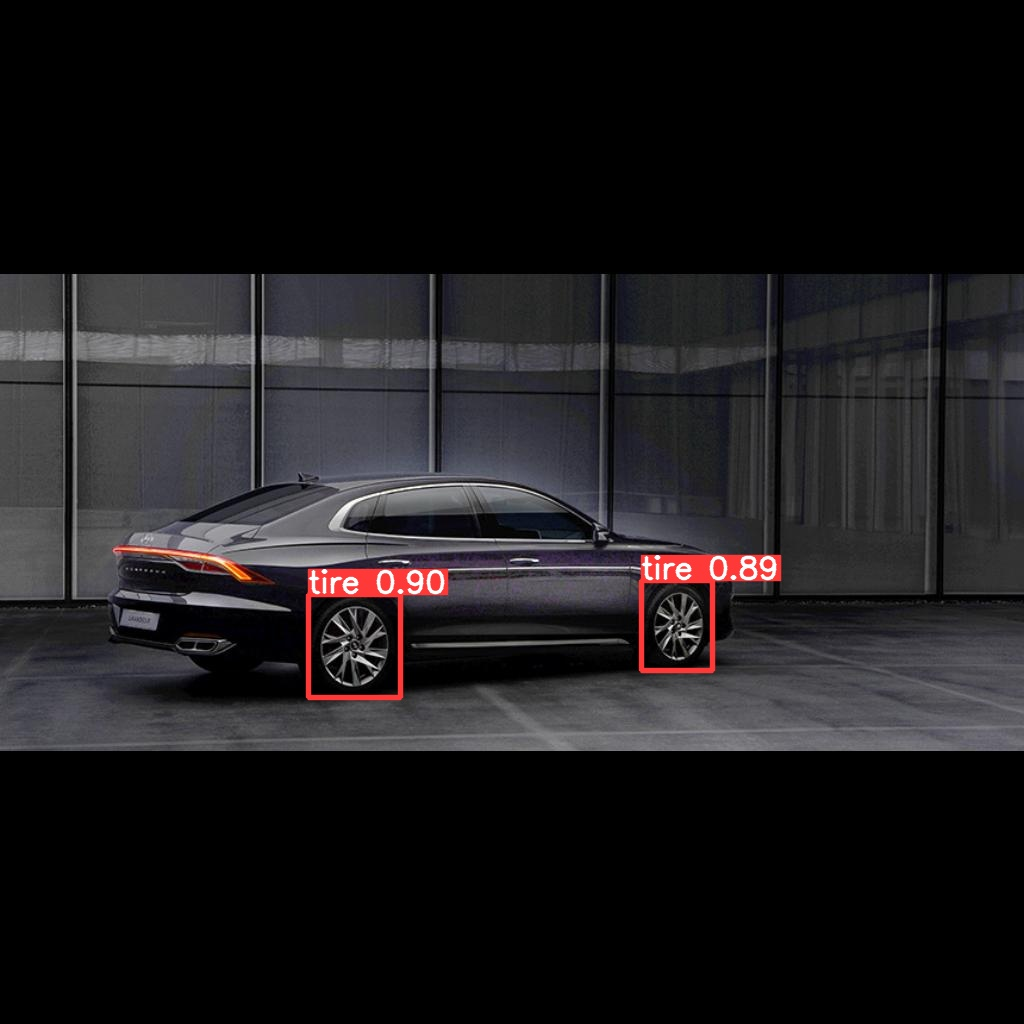

In [44]:
all_image_files = glob.glob('yolov5/runs/detect/exp/*.jpg')
display(Image(filename=all_image_files[0]))

# Service (after)

In [48]:
#image upload (Front Upload Form -> ./car_data/upload)

In [ ]:
# !python yolov5/detect.py --weights yolov5/runs/train/yolov5_coco4/weights/best.pt --img 640 --conf 0.85 --source /Users/jacob/Documents/workspacetf/project_1/car_data/car_label/yaml/test/images
!python yolov5/detect.py --weights yolov5/runs/train/yolov5_coco2/weights/best.pt --img 640 --conf 0.7 --source /Users/jacob/Documents/workspacetf/project_1/car_data/upload


['yolov5/runs/detect/exp2/99F0333359AE58A622.jpg', 'yolov5/runs/detect/exp2/img.jpg', 'yolov5/runs/detect/exp2/tire_1.jpg', 'yolov5/runs/detect/exp2/25197D3D57231E321D.jpg']


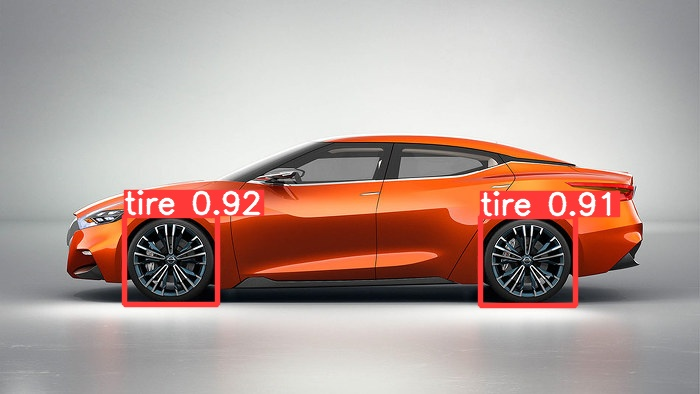

In [51]:
all_image_files = glob.glob('yolov5/runs/detect/exp2/*.jpg')
print(all_image_files)
display(Image(filename=all_image_files[0]))

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/yolov5_coco2/weights/best.pt --img 640 --conf 0.2 --source /Users/jacob/Documents/workspacetf/project_1/car_data/upload/img.jpg


['yolov5/runs/detect/exp3/img.jpg']


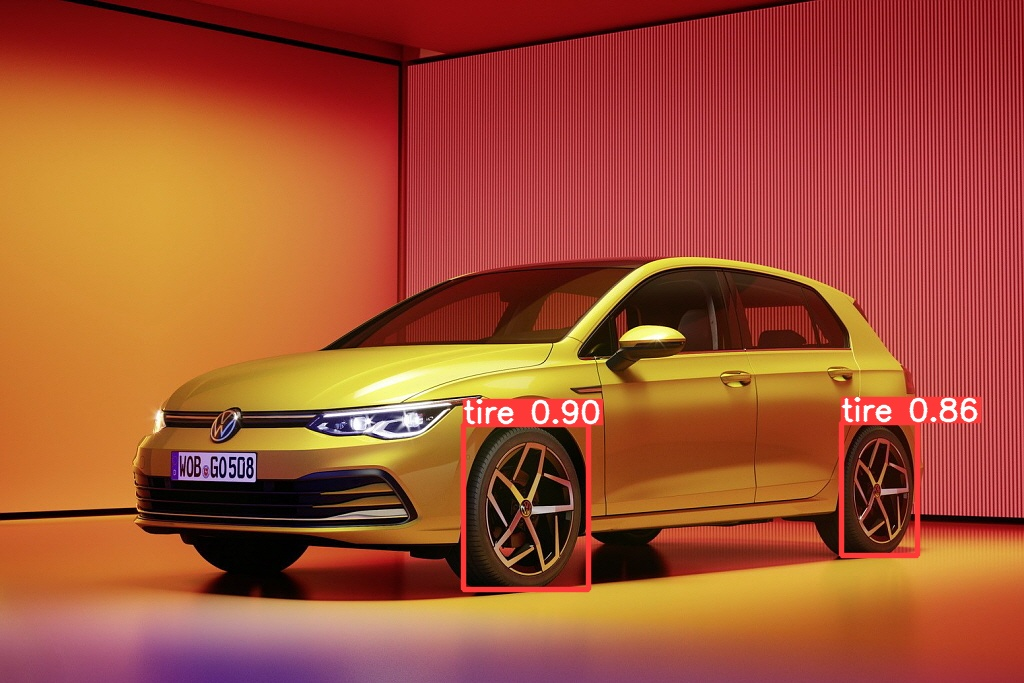

In [53]:
all_image_files = glob.glob('yolov5/runs/detect/result/detected/tire/*.jpg')
print(all_image_files)
display(Image(filename=all_image_files[0]))